# <a id='toc1_'></a>[O Pandas](#toc0_)

*Pandas* - одна из самых важных библиотек в анализе данных.

Название pandas происходит от термина «панельные данные» (англ. panel data). В эконометрии это многомерные структурированные наборы данных.

Pandas - создана специально для работы с табличными данными, она позволяет быстро:
1. загрузить данные из файлов различных форматов 
1. получить статистические характеристики данных
1. очистить данные
1. преобразовать данные
1. сохранить датафрейм в файл


**Содержание**<a id='toc0_'></a>    
- [O Pandas](#toc1_)    
- [Установка Pandas](#toc2_)    
- [Создание объекта DataFrame](#toc3_)    
  - [Чтение данных из файла csv](#toc3_1_)    
- [Итерация по датафрейму](#toc4_)    
- [Обращение к данным](#toc5_)    
- [Удаление данных](#toc6_)    
- [Информация о данных](#toc7_)    
- [Использование функции loc и  логических операций для поиска значений в столбцах, и отбора определенных строк и столбцов](#toc8_)    
- [Графики Pandas](#toc9_)    
- [Работа с категориальными данными](#toc10_)    
  - [Группировка и аггрегация - grouping и aggregation](#toc10_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Основные типы данных с которыми работает Pandas - это Series  и DataFrame

Series: одномерный  массив, содержащий данные любого типа, например, целые числа, строки, объекты и т.д.

DataFrame: двумерная структура данных, которая содержит данные в виде двумерного массива или таблицы со строками и столбцами.

Series 

<img src="image.png"  width="20%" height="30%">

DataFrame

<img src="image2.png"  width="30%" height="30%">


# <a id='toc2_'></a>[Установка Pandas](#toc0_)

In [ ]:
# установка через pip 
%pip install kaggle


In [274]:
# импорт в проект, обычно присваивают сокращение pd
import pandas as pd

import numpy as np

# <a id='toc3_'></a>[Создание объекта DataFrame](#toc0_)

In [275]:
# Создаем Series на основе list

ls = [1, 3, 5, np.nan, 6, "восемь"]  # создаем list


s = pd.Series(ls) # создаем Series

print(type(s))
print(s)


<class 'pandas.core.series.Series'>
0         1
1         3
2         5
3       NaN
4         6
5    восемь
dtype: object


In [276]:
df = pd.DataFrame(ls) # создаем DataFrame на основе того же листа. Индексация строк - автоматически

print(type(df))
print(df)


<class 'pandas.core.frame.DataFrame'>
        0
0       1
1       3
2       5
3     NaN
4       6
5  восемь


Создаем DataFrame на основе массива NumPy.  Индекс строки -  создаем автоматически на основе даты и времени, используя date_range()


In [277]:
dates = pd.date_range("20230101", periods=10)   #массив с индексами строк
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

In [278]:
# np.random.randn(10, 4) - таблица рандомных значений, 10 строк, 4 столбца
# index=dates - индекс строк, одномерный массив из 10 значений, сформированный ранее
# columns=list("ABCD") - название столбцов, создается лист из строковой переменной
df = pd.DataFrame(np.random.randn(10, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2023-01-01,-0.290108,2.248995,0.160448,-1.312884
2023-01-02,-0.825270,-0.496219,-0.203855,-0.424620
2023-01-03,1.670281,-1.207565,-0.312151,1.081825
2023-01-04,0.953921,-0.690027,-1.125668,1.242790
2023-01-05,-0.104965,-0.302199,-1.075217,-0.889492
2023-01-06,-0.844066,0.015687,0.168624,-1.351690
2023-01-07,-0.335370,1.136951,-0.204276,-0.564668
2023-01-08,-0.926855,-1.428214,0.241608,-0.255234
2023-01-09,0.333230,1.831832,1.177125,-0.668679
2023-01-10,-0.680546,-2.015410,1.278251,-1.441921


In [279]:
# Создаем DataFrame на основе словаря (dictionary)
d = {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.arange( 0, 4, 1),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }

df = pd.DataFrame(d)

df

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,0,test,foo
1,1.0,2013-01-02,1.0,1,train,foo
2,1.0,2013-01-02,1.0,2,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [280]:
# Посмотрим тимы данных. Они разные.

df.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

 

## <a id='toc3_1_'></a>[Чтение данных из файла csv](#toc0_)

|Формат файла	|Расширение	|Функция чтения	| Функция записи|
| ------------- |----------------|--------|---------------|
|text	|CSV	|read_csv	|to_csv|
|text	|Fixed-Width Text File	|read_fwf	||
|text	|JSON	|read_json	|to_json|
|text	|HTML	|read_html	|to_html|
|text	|LaTeX	|	|Styler.to_latex|
|text	|XML	|read_xml	|to_xml|
|text	|Local clipboard	|read_clipboard	|to_clipboard|
|binary	|MS Excel	|read_excel	|to_excel|
|binary	|OpenDocument	|read_excel	||
|binary	|HDF5 Format	|read_hdf	|to_hdf|
|binary	|Feather Format	|read_feather	|to_feather|
|binary	|Parquet Format	|read_parquet	|to_parquet|
|binary	|ORC Format	|read_orc	|to_orc|
|binary	|Stata	|read_stata	|to_stata|
|binary	|SAS	|read_sas	||
|binary	|SPSS	|read_spss	||
|binary	|Python Pickle Format	|read_pickle	|to_pickle|
|SQL	|SQL	|read_sql	|to_sql|
|SQL	|Google BigQuery	|read_gbq	|to_gbq|


In [281]:
# читаем из csv
df = pd.read_csv("train.csv", sep=',') 

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [282]:
'''
    задаем разделитель 
    определям, что первый столбец является так же и индексом 
'''

df2 = pd.read_csv("train.csv", sep=',', index_col=0)  

df2


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [283]:
'''
    задаем разделитель 
    определям, что первый столбец является так же и индексом 
    переназываем столбцы
'''


df3 = pd.read_csv("train.csv", sep=',', index_col=0, names=['Id', 'survived', 'class', 'full_name', 'sex', 'age','sib', 
                                                            'patch','tickets','fare','cabin','embarked'])

df3

,survived,class,full_name,sex,age,sib,patch,tickets,fare,cabin,embarked
Id,,,,,,,,,,,
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S


# <a id='toc4_'></a>[Итерация по датафрейму](#toc0_)

Cуществует много способов итерации по датафрейму.

In [284]:
# создани датафрайм
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [ np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [ np.nan, pd.Timestamp("1940-04-25"),np.nan]})

In [285]:
df.columns # возвращает список колонок датафрейма

Index(['name', 'toy', 'born'], dtype='object')

In [286]:
df.index.to_list() # возвращает список строк датафрейма. Index вернет RangeIndex объект

[0, 1, 2]

Способы итерации по датафрейму

In [287]:
for column, value_in_column in df.items():
   print(column)
   print(value_in_column)
   break

name
0      Alfred
1      Batman
2    Catwoman
Name: name, dtype: object


In [288]:
for key in df.columns:
   print(key)
   
print("========================")
# это одно и то же...
for elem in df:
    print(elem) # очередной атрибут датафрейма

name
toy
born
name
toy
born


In [289]:
for a in df.index:
    print(a) # очередной индекс датафрейма

0
1
2


In [290]:
for elem in df.iterrows():
  print(elem[0]) # индекс строки
  print(elem[1]) # значения атрибутов строки
  break

0
name    Alfred
toy        NaN
born       NaT
Name: 0, dtype: object


In [291]:
for elem in df.items():
  print(elem[0]) # столбец
  print(elem[1]) # список значений столбца
  break

name
0      Alfred
1      Batman
2    Catwoman
Name: name, dtype: object


# <a id='toc5_'></a>[Обращение к данным](#toc0_)

In [292]:
# считываем данные

df = pd.read_csv("train.csv", sep=',', index_col=0)  

In [293]:
df['Survived'] # значения одного столбца
df.Survived

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [294]:
df['Survived'][1] # конкретное значение

0

In [295]:
df['Survived'][1:10:2] # есть возможность использовать срезы

PassengerId
2     1
4     1
6     0
8     0
10    1
Name: Survived, dtype: int64

# <a id='toc6_'></a>[Удаление данных](#toc0_)

In [296]:
# создани датафрайм
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [ np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [ np.nan, pd.Timestamp("1940-04-25"),np.nan]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [297]:
# вот так исходный датасет не изменится
df1 = df.dropna()
print(f"модифицированный датасет\n {df1}")
print(f"\nисходный датасет\n {df}")

модифицированный датасет
      name        toy       born
1  Batman  Batmobile 1940-04-25

исходный датасет
        name        toy       born
0    Alfred        NaN        NaT
1    Batman  Batmobile 1940-04-25
2  Catwoman   Bullwhip        NaT


In [298]:
# а вот так исходный датасет изменится
df.dropna(inplace=True)
df

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [299]:
# drop_duplicates после применения возвращает датафрейм без повторяющихся строк
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 5, 5]
})
print(f"\nисходный датасет\n {df}")

df.drop_duplicates(inplace=True)
print(f"\nмодифицированный датасет\n {df}")


исходный датасет
      brand style  rating
0  Yum Yum   cup     4.0
1  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack     5.0
4  Indomie  pack     5.0

модифицированный датасет
      brand style  rating
0  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack     5.0


In [300]:
# drop - удаляет элементы из строк и столбцов, а также и сами столбцы/строки)

df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 5, 5]
})
print(f"\nисходный датасет\n {df}")

df.drop('brand',axis=1,inplace=True)
print(f"\nмодифицированный датасет. Удалили столбец brand\n {df}")

df.drop(2,axis=0,inplace=True)
print(f"\nмодифицированный датасет. Удалили строку 2\n {df}")


исходный датасет
      brand style  rating
0  Yum Yum   cup     4.0
1  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack     5.0
4  Indomie  pack     5.0

модифицированный датасет. Удалили столбец brand
   style  rating
0   cup     4.0
1   cup     4.0
2   cup     3.5
3  pack     5.0
4  pack     5.0

модифицированный датасет. Удалили строку 2
   style  rating
0   cup     4.0
1   cup     4.0
3  pack     5.0
4  pack     5.0


# <a id='toc7_'></a>[Информация о данных](#toc0_)

In [301]:
# считываем данные

df = pd.read_csv("train.csv", sep=',', index_col=0)  

In [302]:
# cмотрим первые 10 строк. Если не указать сколько - покажет первые 5
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [303]:
# cмотрим последние 5 строк. Как и в head можно указать прямо - сколько строк
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [304]:
# размер датасета - кол-во строк и столбцов

df.shape

(891, 11)

In [305]:
df.index  # смотрим индексы строк

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
      dtype='int64', name='PassengerId', length=891)

In [306]:
df.columns   # список названий всех столбцов

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [307]:
# получить обычный двумерный массив, то есть без номеров строк и названий столбцов

f = df.to_numpy()

f

array([[0, 3, 'Braund, Mr. Owen Harris', ..., 7.25, nan, 'S'],
       [1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', ...,
        71.2833, 'C85', 'C'],
       [1, 3, 'Heikkinen, Miss. Laina', ..., 7.925, nan, 'S'],
       ...,
       [0, 3, 'Johnston, Miss. Catherine Helen "Carrie"', ..., 23.45,
        nan, 'S'],
       [1, 1, 'Behr, Mr. Karl Howell', ..., 30.0, 'C148', 'C'],
       [0, 3, 'Dooley, Mr. Patrick', ..., 7.75, nan, 'Q']], dtype=object)

Массивы NumPy имеют один тип данных dtype для всего массива, тогда как DataFrames pandas имеют различные типы для разных столбцов. Когда вы вызываете DataFrame.to_numpy(), pandas найдет dtype NumPy, который может содержать все dtypes в DataFrame. 
Если общий тип данных — объект, то DataFrame.to_numpy() сделает копирования данных.

In [308]:
# описание данных
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


count -  количество значений в столбце

mean - среднее

50% - медиана

min, max - минимальное и максимальное значения

std - стандартная девиация


In [309]:
# Можно получить информацию и по конкретному столбцу
print(f"Сумма значений {df.Age.sum()}")  
print(f"Кол-во ненулевых записей в столбце {df.Age.count()}")  
print(f"Cреднее {df.Age.mean()}")   
print(f"Медиана {df.Age.median()}")  

Сумма значений 21205.17
Кол-во ненулевых записей в столбце 714
Cреднее 29.69911764705882
Медиана 28.0


In [310]:
# Функция describe покажет статистику только для числовых значений. Посмотрим, какие у нас вообще типы столбцов есть: 

df.dtypes

# int и float - количественные данные
# object - категориальные данные

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [311]:
# Посмотреть корреляцию параметров датасета друг с другом. Не будет работать, если в наборе данных есть категориальные значения!
# у нас такие есть, поэтом смотрим только для столбцов с количественными данными
cdf = df[['Survived',	'Pclass',	'Age',	'SibSp',	'Parch',	'Fare']].corr() 
cdf

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [312]:
# Подсчет уникальных значений в категориальном столбце

print("Найти уникальные значения в столбце. Два вида обращения к значения.")
print(df['Embarked'].unique())
print(df.Embarked.unique())

print("конвертация в список")
print(df.Embarked.unique().tolist())

print("Уникальные значения с drop_duplicates")
df.Embarked.drop_duplicates()
print(df)



Найти уникальные значения в столбце. Два вида обращения к значения.
['S' 'C' 'Q' nan]
['S' 'C' 'Q' nan]
конвертация в список
['S', 'C', 'Q', nan]
Уникальные значения с drop_duplicates
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  fe

In [313]:
print("Использование pandas.unique() для получения уникальных значений в комбинации значений нескольких столбцов")
df2 = pd.unique(df[['Embarked', 'Sex']].values.ravel('K'))
print(df2)

print("Использование pandas.unique() для получения уникальных значений")
df2 = pd.unique(df[['Embarked']].values.ravel())
print(df2)
 
  


Использование pandas.unique() для получения уникальных значений в комбинации значений нескольких столбцов
['S' 'C' 'Q' nan 'male' 'female']
Использование pandas.unique() для получения уникальных значений
['S' 'C' 'Q' nan]


In [314]:
print("Использование метода set()")
df2 = set(df.Embarked) | set(df.Sex)
print(df2)

print("Получить уникальные значения в одной серии/столбце")
df2 = df['Embarked'].unique()
print(df2)

print("Использование pandas.concat чтобы расширить один столбец на несколько столбцов")
df2 = pd.concat([df['Embarked'],df['Sex'],df['Ticket']]).unique()
print(df2)



Использование метода set()
{'C', 'Q', nan, 'male', 'S', 'female'}
Получить уникальные значения в одной серии/столбце
['S' 'C' 'Q' nan]
Использование pandas.concat чтобы расширить один столбец на несколько столбцов
['S' 'C' 'Q' nan 'male' 'female' 'A/5 21171' 'PC 17599' 'STON/O2. 3101282'
 '113803' '373450' '330877' '17463' '349909' '347742' '237736' 'PP 9549'
 '113783' 'A/5. 2151' '347082' '350406' '248706' '382652' '244373'
 '345763' '2649' '239865' '248698' '330923' '113788' '347077' '2631'
 '19950' '330959' '349216' 'PC 17601' 'PC 17569' '335677' 'C.A. 24579'
 'PC 17604' '113789' '2677' 'A./5. 2152' '345764' '2651' '7546' '11668'
 '349253' 'SC/Paris 2123' '330958' 'S.C./A.4. 23567' '370371' '14311'
 '2662' '349237' '3101295' 'A/4. 39886' 'PC 17572' '2926' '113509' '19947'
 'C.A. 31026' '2697' 'C.A. 34651' 'CA 2144' '2669' '113572' '36973'
 '347088' 'PC 17605' '2661' 'C.A. 29395' 'S.P. 3464' '3101281' '315151'
 'C.A. 33111' 'S.O.C. 14879' '2680' '1601' '348123' '349208' '374746'
 '24

In [315]:
print("Использование Series.drop_duplicates() для получения уникальных значений")
print(df.Embarked.drop_duplicates())

print("Вывод уникальных значений в столбце и подсчет кол-ва этих уникальных значений")
print(df['Embarked'].value_counts())

Использование Series.drop_duplicates() для получения уникальных значений
PassengerId
1       S
2       C
6       Q
62    NaN
Name: Embarked, dtype: object
Вывод уникальных значений в столбце и подсчет кол-ва этих уникальных значений
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [316]:
# isnull() и isna() - возвращает True, если в ячейке пустые данные, и False, если это не так

df.Age.isnull()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [317]:
df.Age.isna()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

# <a id='toc8_'></a>[Использование функции loc и  логических операций для поиска значений в столбцах, и отбора определенных строк и столбцов](#toc0_)

In [318]:
# loc выбирает группу строк и колонок исходя из меток или булева списка

df.loc[1] # первая строка

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                            22.0
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

In [319]:
df.loc[[1, 4, 7]]  #  строки 1, 4, 7

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [320]:
# при задаче получить конкретные строки исходя из условия,
# можно передать в loc список булевых значений, благодаря
# которым метод вернет строки, номер которых совпадает с индексом списка, где стоят значения True
df[:3].loc[[True, False, True]]  

# df[:3] - возвращает первые 3 строки
# [True, False, True]  - отбираем дл показа 1 и 3 строки. Строка 2 не отбирается

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


In [321]:
# В pandas можно указывать условия, по которым будут отбираться объекты из датафрейма. 
# Но таким способом можно указать только одно условие

df[df['Age'] == 29]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S
67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S
232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S
243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S


In [322]:
# Если нужно более, чем одно условие, то используем loc:
df.loc[(df['Age'] == 29) & (df['Sex'] == "male")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S
243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
337,0,1,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6000,C2,S
362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
423,0,3,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S
456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C


In [323]:
# Создадим маски для отбора значений, где у пассажирова определен класс каюты, но пропущен возраст (null)

print(f"непустых значений Age {df.Age.count()}. пустых занчений Age {df.Age.isna().sum()}\n")

mask1 = (df.Pclass == 1) & (df.Age.isnull())
mask2 = (df.Pclass == 2) & (df.Age.isnull())
mask3 = (df.Pclass == 3) & (df.Age.isnull())

# Теперь мы знаем, как заполнить пропущенные значения. 
# В данном случаем мы их заполняем медианными значениями возраста пассажиров в аналогичных классах каюты 
df.loc[mask1, 'Age'] = df[df.Pclass == 1]['Age'].median()
df.loc[mask2, 'Age'] = df[df.Pclass == 2]['Age'].median()
df.loc[mask3, 'Age'] = df[df.Pclass == 3]['Age'].median()

непустых значений Age 714. пустых занчений Age 177



In [324]:
# проверяем
print(f"непустых значений Age {df.Age.count()}. пустых занчений Age {df.Age.isnull().sum()}")

непустых значений Age 891. пустых занчений Age 0


# <a id='toc9_'></a>[Графики Pandas](#toc0_)

<Axes: ylabel='Frequency'>

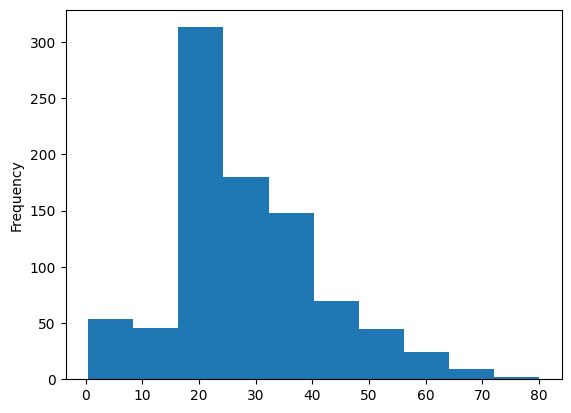

In [350]:
# Распределения и гистограммы

df['Age'].plot(kind="hist")

<Axes: >

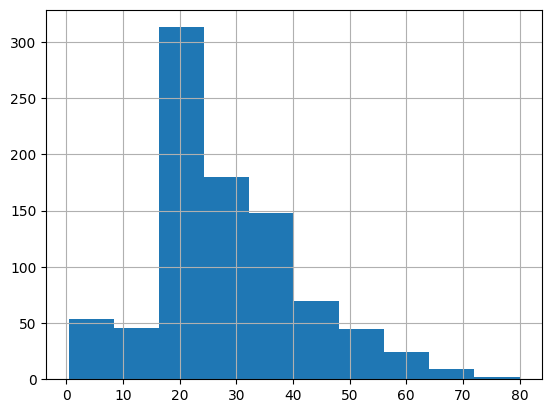

In [327]:
df['Age'].hist()

<Axes: xlabel='Fare'>

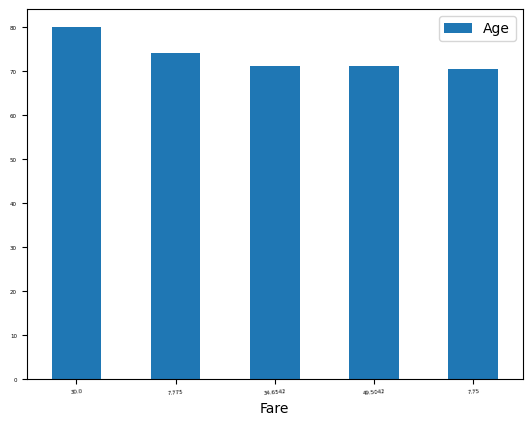

In [351]:
# столбчатая диаграмма

top_5 = df.sort_values(by="Age", ascending=False).head()
top_5.plot(x="Fare", y="Age", kind="bar", rot=5, fontsize=4)

<Axes: xlabel='Fare', ylabel='Age'>

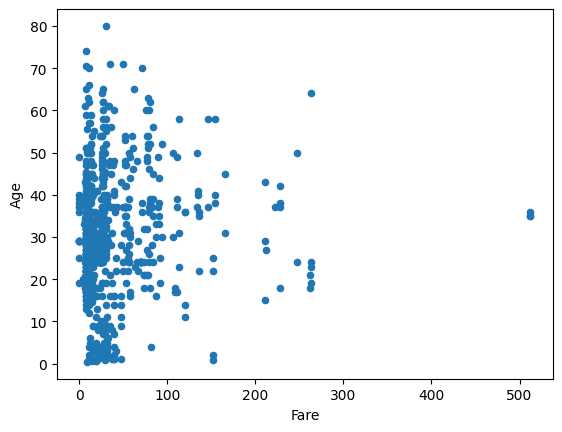

In [352]:
# Анализ корреляции параметров при помощи диаграммы рассеяния

df.plot(x="Fare", y="Age", kind="scatter")

# <a id='toc10_'></a>[Работа с категориальными данными](#toc0_)

## <a id='toc10_1_'></a>[Группировка и аггрегация - grouping и aggregation](#toc0_)

In [354]:
# сколько в сумме стоили билеты у мужчин и женщин
sex_fare = df.groupby("Sex")["Fare"].sum().sort_values()
sex_fare

Sex
female    13966.6628
male      14727.2865
Name: Fare, dtype: float64

In [357]:
all_fare = df.groupby('Pclass')["Fare"].sum().sort_values()
all_fare

Pclass
2     3801.8417
3     6714.6951
1    18177.4125
Name: Fare, dtype: float64

<Axes: ylabel='Pclass'>

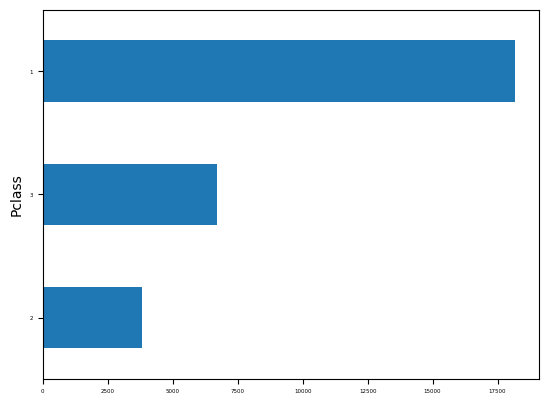

In [358]:
all_fare.plot(kind="barh", fontsize=4)

<Axes: >

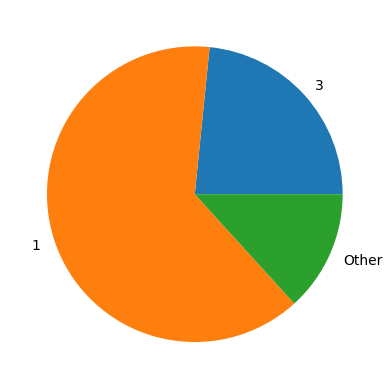

In [375]:
# Определяем и отрисовываем долю трат в 1, 2, 3 классах




# все, что меньше 4000 - сначала отбираем, а потом запихиваем в категорию Other
small_cat_totals = all_fare[all_fare <= 4000]

# все, что больше 4000 - так и пойдет в основную диаграмму
big_cat_totals = all_fare[all_fare > 4000]

# тут все, что попало в small_cat_totals - суммируем, и отпрвляем в новый раздел Other
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])

# добавляем к основной Series
big_cat_totals = big_cat_totals._append(small_sums)
# отрисовываем
big_cat_totals.plot(kind="pie", label="")